<a href="https://colab.research.google.com/github/Satwikram/NLP-Implementations/blob/main/Feature%20Engineering%20for%20NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Author: Satwik Ram K

In [ ]:
from google.colab import files

files.upload()


! mkdir ~/.kaggle


! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


### Downloading the dataset

In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 31.5MB/s]


In [ ]:
!unzip /content/sms-spam-collection-dataset.zip

Archive:  /content/sms-spam-collection-dataset.zip
  inflating: spam.csv                


### Importing Dependencies

In [ ]:
import pandas as pd
import numpy as np
import re
import string

### Loading Dataset

In [ ]:
dataset = pd.read_csv("/content/spam.csv", encoding="latin-1")

In [ ]:
dataset.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
dataset.drop(columns = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], inplace = True)

In [ ]:
dataset.shape

(5572, 2)

In [ ]:
dataset.columns = ["target", "text"]

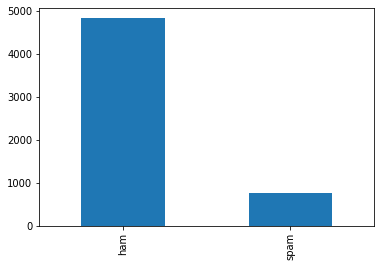

In [ ]:
dataset["target"].value_counts().plot(kind = "bar");

### Feature Engineering

#### Removing Extra spaces before doing feature engineering

In [ ]:
dataset["Cleaned"] = dataset["text"].apply(lambda x: re.sub("\s+", " ", x))

In [ ]:
dataset["Cleaned"][100], dataset["text"][100]

('Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx',
 'Okay name ur price as long as its legal! Wen can I pick them up? Y u ave x ams xx')

#### Calculating text length

In [ ]:
len(dataset["Cleaned"][0]) - dataset["Cleaned"][0].count(" ")

92

In [ ]:
dataset["length"] = dataset["Cleaned"].apply(lambda x: len(x) - x.count(" "))

In [ ]:
dataset["length"]

0        92
1        24
2       128
3        39
4        49
       ... 
5567    132
5568     30
5569     48
5570    100
5571     21
Name: length, Length: 5572, dtype: int64

#### Number of Words in text

In [ ]:
dataset["Cleaned"][0].split()

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...']

In [ ]:
dataset["Number of words"] = dataset["Cleaned"].apply(lambda x: len(x.split()))

In [ ]:
dataset["Number of words"]

0       20
1        6
2       28
3       11
4       13
        ..
5567    30
5568     8
5569    10
5570    26
5571     6
Name: Number of words, Length: 5572, dtype: int64

#### % of punctuations in text

In [ ]:
def count_punct(text):

  count = sum([1 for char in text if char in string.punctuation])
  return round(count / (len(text) - text.count(" ")), 3) * 100

In [ ]:
dataset["punct%"] = dataset["Cleaned"].apply(lambda x: count_punct(x))

In [ ]:
dataset.head()

,target,text,Cleaned,length,Number of words,punct%
0,ham,"Go until jurong point, crazy.. Available only ...","Go until jurong point, crazy.. Available only ...",92,20,9.8
1,ham,Ok lar... Joking wif u oni...,Ok lar... Joking wif u oni...,24,6,25.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,128,28,4.7
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor... U c already then say...,39,11,15.4
4,ham,"Nah I don't think he goes to usf, he lives aro...","Nah I don't think he goes to usf, he lives aro...",49,13,4.1


### Evaluate Created features

In [ ]:
import matplotlib.pyplot as plt

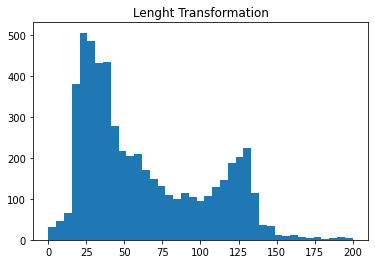

In [ ]:
bins = np.linspace(0, 200, 40)
plt.hist(dataset["length"], bins)
plt.title("Lenght Transformation")
plt.show()

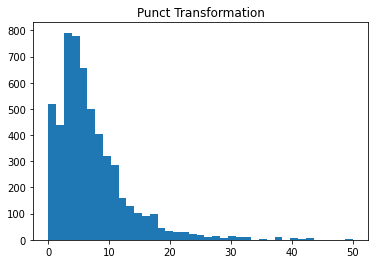

In [ ]:
bins = np.linspace(0, 50, 40)
plt.hist(dataset["punct%"], bins)
plt.title("Punct Transformation")
plt.show()

#### Transformation

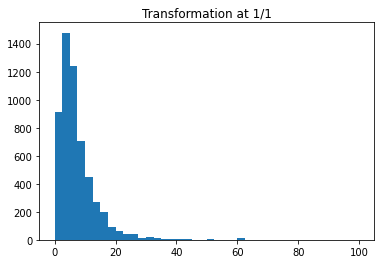

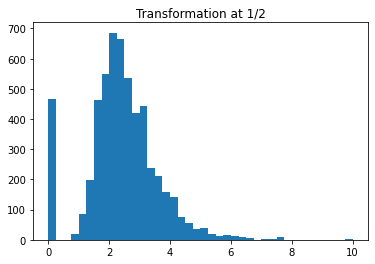

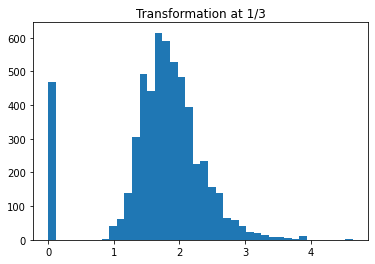

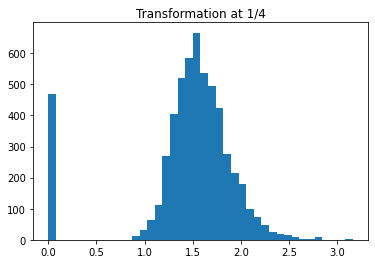

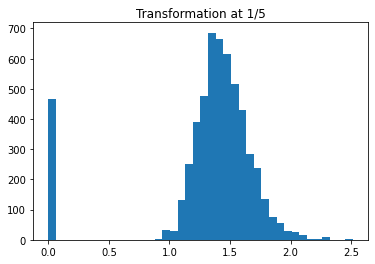

In [ ]:
for i in [1, 2, 3, 4, 5]:
  plt.hist((dataset["punct%"])**(1/i), bins = 40)
  plt.title("Transformation at 1/{}".format(str(i)))
  plt.show()